<a href="https://colab.research.google.com/github/haishesauke/Alfido-Tech/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Reading into the Dataset 📑

In [52]:
# loading the movies.dat file
file_path = 'movies.dat'
delimiter = '::'
encoding = 'latin-1'
movies = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding, engine = 'python')

In [53]:
movies.columns = ['MovieId', 'Movie_Name', 'Genere']
movies.dropna(inplace=True)
movies.head()

,MovieId,Movie_Name,Genere
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [54]:
# loading the ratings.dat file
file_path = 'ratings.dat'
delimeter = '::'
encoding =  'latin-1'
ratings =  pd.read_csv(file_path, delimiter= delimiter, encoding = encoding, engine = 'python')
ratings.columns= ["ID", "MovieId", "Ratings", "Time_Stamp"]
ratings.dropna(inplace=True)
ratings.head()

,ID,MovieId,Ratings,Time_Stamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [55]:
# loading the user.dat file
file_path = 'users.dat'
delimiter = "::"
encoding = "latin-1"
users = pd.read_csv(file_path, delimiter = delimiter , encoding = encoding, engine = "python")
users.columns = ['UserID', "Gender", "Age", "Occupation", "Zip-code"]
users.dropna(inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [56]:
# concatinating the different data frames into one data frame
df = pd.concat([movies, ratings, users], axis = 1)
df.head()

,MovieId,Movie_Name,Genere,ID,MovieId,Ratings,Time_Stamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


#Visualization 📊

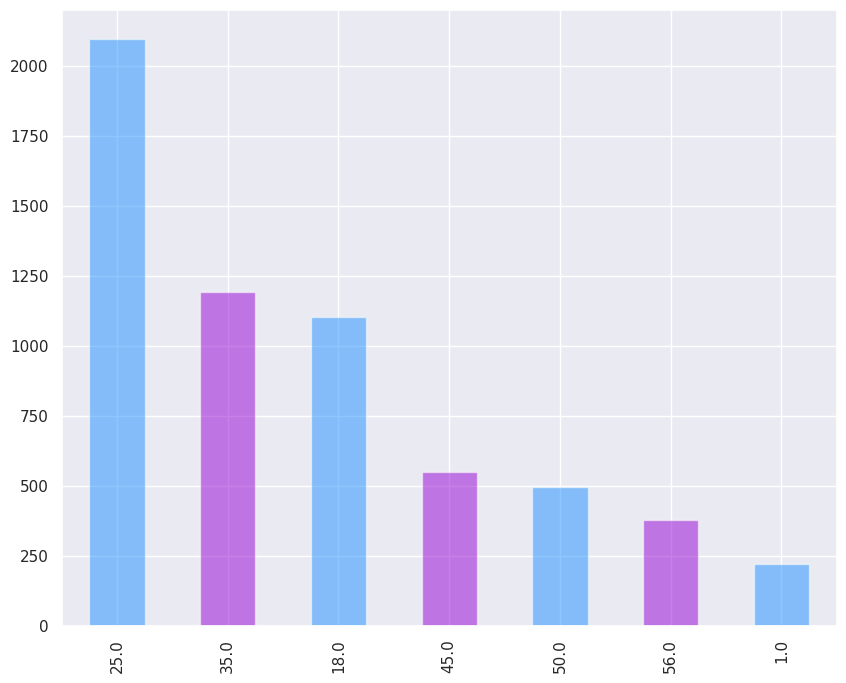

In [57]:
df['Age'].value_counts().plot(kind = 'bar', alpha = 0.5, figsize = (10,8) , color = ['#1E90FF', '#9400D3'])
plt.show()

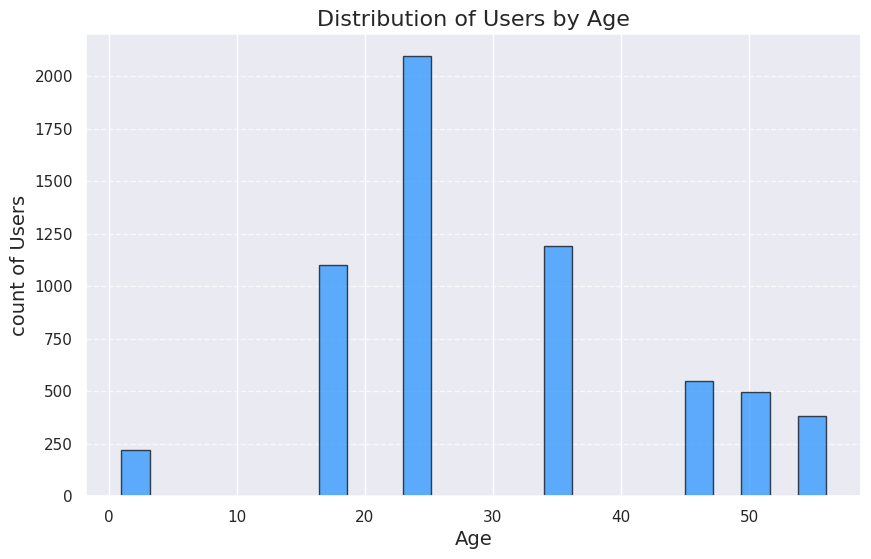

In [58]:
plt.figure(figsize= (10,6))
plt.hist(df.Age , bins = 25, color = '#1E90FF', edgecolor ='black', alpha = 0.7 )
plt.title("Distribution of Users by Age", fontsize = 16)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("count of Users", fontsize =  14 )
plt.grid(axis = 'y', linestyle = '--' , alpha = 0.7)
plt.show()

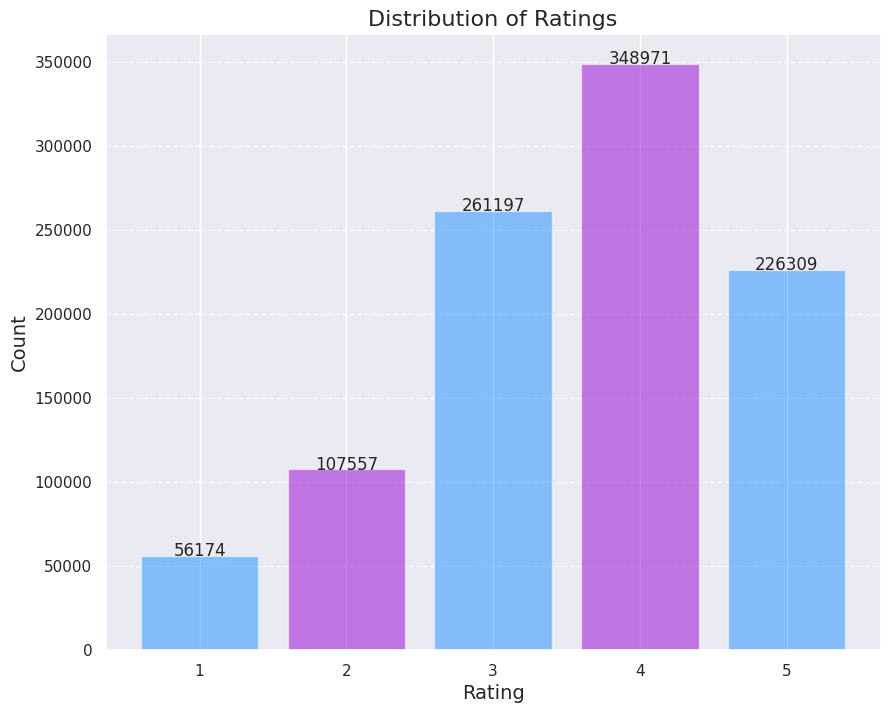

In [59]:


plt.figure(figsize = (10, 8))
rating_counts = df['Ratings'].value_counts().sort_index()
bars = plt.bar(rating_counts.index , rating_counts.values , color = ['#1E90FF', '#9400D3'], alpha = 0.5 )
for bar, count in zip(bars, rating_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2, count, str(count), ha = 'center', fontsize = 12)

plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

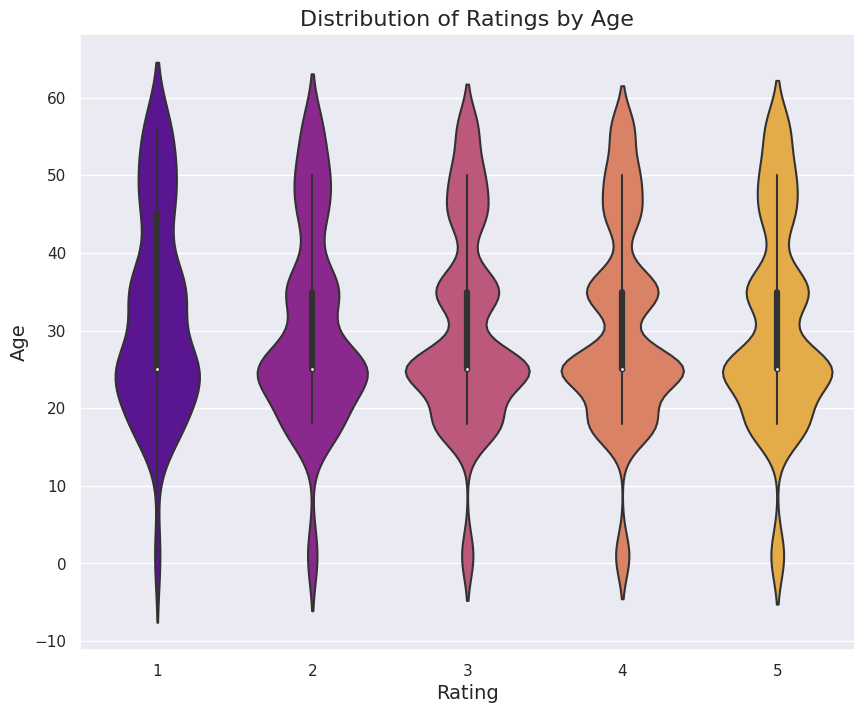

In [60]:
# distrivution pf "AGE" and "RATINGS"
sns.set(style = 'darkgrid')
plt.figure(figsize = (10, 8))
sns.violinplot(data=df, x='Ratings', y='Age', palette='plasma')
plt.title("Distribution of Ratings by Age", fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

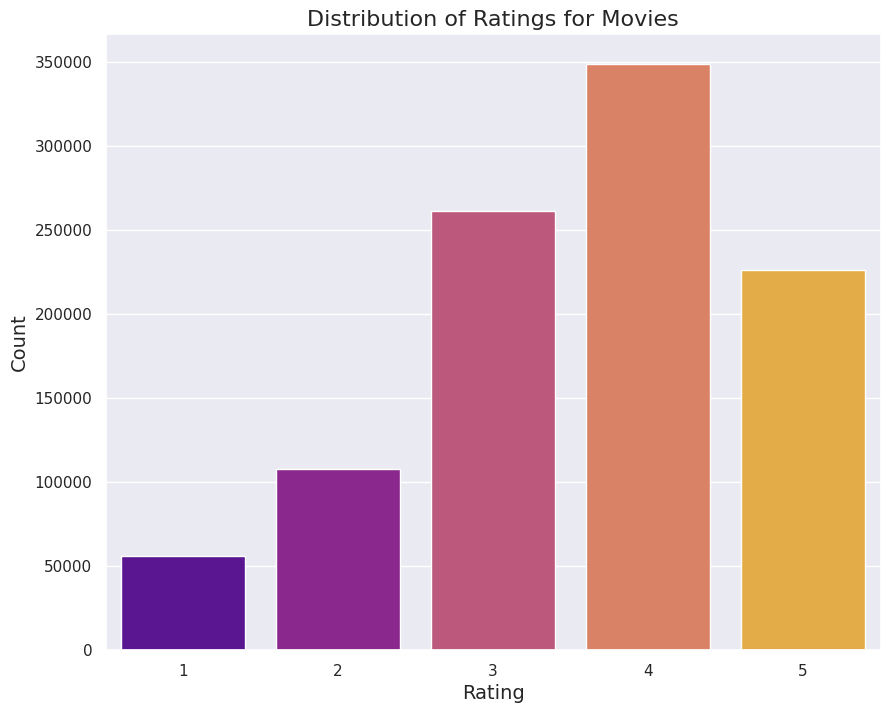

In [61]:
# distribution of ratings for movies
plt.figure(figsize =(10,8))
sns.countplot(data = df , x ="Ratings" , palette = "plasma")
plt.title("Distribution of Ratings for Movies", fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

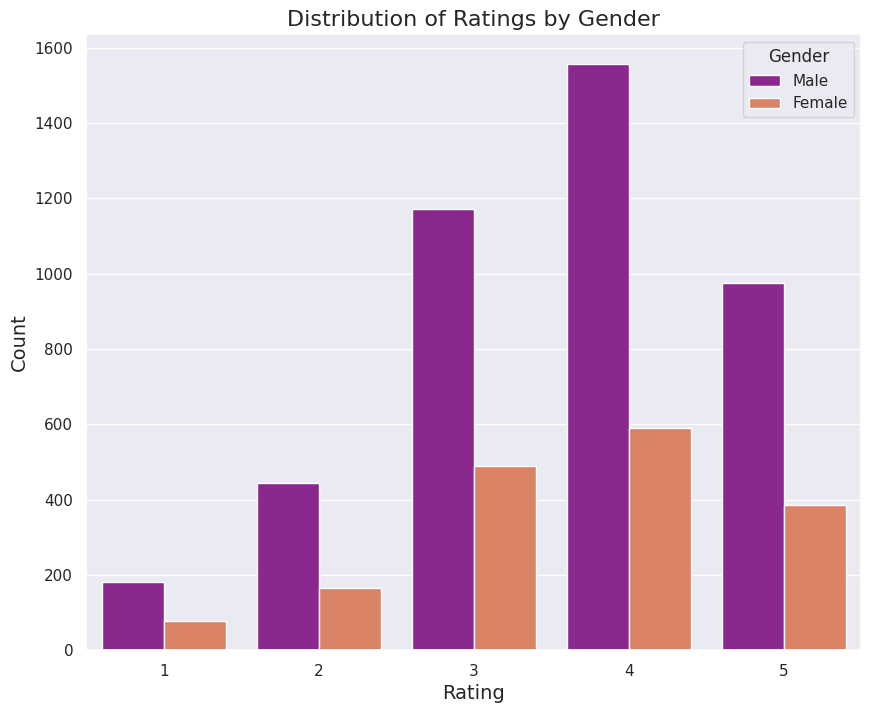

In [62]:
#distribution of Ratings by Gender
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Ratings', hue='Gender', palette="plasma")
plt.title("Distribution of Ratings by Gender", fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()

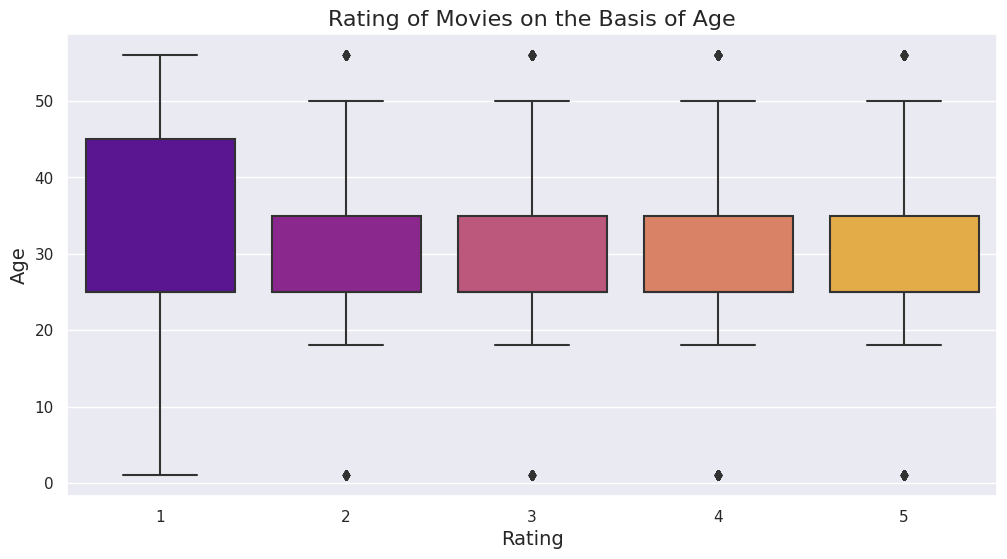

In [63]:
#Rating of Movies on the Basis of Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Ratings', y='Age', palette='plasma')
plt.title("Rating of Movies on the Basis of Age", fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

#Machine Learning Model 💻

In [64]:
#First 500 extracted records
df_500 = df[500:]
df_500.dropna(inplace=True)

<ipython-input-64-ae91989bf9aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500.dropna(inplace=True)


In [65]:
#Use the following features:movie id,age,occupation
features = df_500[['MovieId','Age','Occupation']].values

#Use rating as label
labels = df_500[['Ratings']].values

In [66]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

In [67]:
# logistic regression
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(train, train_labels)
y_pred = lr_model.predict(test)
accuracy_lr_model = round(lr_model.score(train, train_labels)*100 , 2)
accuracy_lr_model

34.17

In [68]:
# Gaussian Naive Bayes Model
gnb_model = GaussianNB()
gnb_model.fit(train, train_labels)
y_pred = gnb_model.predict(test)
accurayc_gnb_model = round(gnb_model.score(train, train_labels)*100, 2)
accurayc_gnb_model

35.01

In [69]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train , train_labels)
y_pred = knn_model.predict(test)
accuracy_knn_model = round(knn_model.score(train, train_labels)*100, 2)
accuracy_knn_model

60.53

In [70]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train, train_labels)
Y_pred = dt_model.predict(test)
accuracy_dt_model = round(dt_model.score(train, train_labels) * 100, 2)
accuracy_dt_model

100.0

In [71]:
models = pd.DataFrame({
    'Model': ['logistic regression', 'Gaussian Naive Bayes', 'KNeighbors', 'DecisionTree'],
    'Score': [accuracy_lr_model, accuracy_dt_model, accuracy_knn_model, accurayc_gnb_model]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Gaussian Naive Bayes,100.00
2,KNeighbors,60.53
3,DecisionTree,35.01
0,logistic regression,34.17
